In [ ]:
## Task1 赛题理解
Tip:本次新人赛是Datawhale与天池联合发起的0基础入门系列赛事第四场 —— 零基础入门金融风控之贷款违约预测挑战赛。
	赛题以金融风控中的个人信贷为背景，要求选手根据贷款申请人的数据信息预测其是否有违约的可能，以此判断是否通过此项贷款，这是一个典型的分类问题。通过这道赛题来引导大家了解金融风控中的一些业务背景，解决实际问题，帮助竞赛新人进行自我练习、自我提高。

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction

In [ ]:
### 1.1 学习目标
理解赛题数据和目标，清楚评分体系。

完成相应报名，下载数据和结果提交打卡（可提交示例结果），熟悉比赛流程


In [ ]:
### 1.2 了解赛题
- 赛题概况
- 数据概况
- 预测指标
- 分析赛题

In [ ]:
### 1.2.1 赛题概况

In [ ]:
##### 比赛要求参赛选手根据给定的数据集，建立模型，预测金融风险。
赛题以预测金融风险为任务，数据集报名后可见并可下载，该数据来自某信贷平台的贷款记录，总数据量超过120w，包含47列变量信息，其中15列为匿名变量。为了保证比赛的公平性，将会从中抽取80万条作为训练集，20万条作为测试集A，20万条作为测试集B，同时会对employmentTitle、purpose、postCode和title等信息进行脱敏。


In [ ]:
通过这道赛题来引导大家走进金融风控数据竞赛的世界，主要针对于于竞赛新人进行自我练习、自我提高。

In [ ]:
### 1.2.2 数据概况

In [ ]:
一般而言，对于数据在比赛界面都有对应的数据概况介绍（匿名特征除外），说明列的性质特征。了解列的性质会有助于我们对于数据的理解和后续分析。 Tip:匿名特征，就是未告知数据列所属的性质的特征列。

In [ ]:
train.csv

In [ ]:
- id	为贷款清单分配的唯一信用证标识
- loanAmnt	贷款金额
- term	贷款期限（year）
- interestRate	贷款利率
- installment	分期付款金额
- grade	贷款等级
- subGrade	贷款等级之子级
- employmentTitle	就业职称
- employmentLength	就业年限（年）
- homeOwnership	借款人在登记时提供的房屋所有权状况
- annualIncome	年收入
- verificationStatus	验证状态
- issueDate	贷款发放的月份
- purpose	借款人在贷款申请时的贷款用途类别
- postCode	借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode	地区编码
- dti	债务收入比
- delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
- openAcc	借款人信用档案中未结信用额度的数量
- pubRec	贬损公共记录的数量
- pubRecBankruptcies	公开记录清除的数量
- revolBal	信贷周转余额合计
- revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc	借款人信用档案中当前的信用额度总数
- initialListStatus	贷款的初始列表状态
- applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine	借款人最早报告的信用额度开立的月份
- title	借款人提供的贷款名称
- policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理


### 1.2.3 预测指标

竞赛采用AUC作为评价指标。AUC（Area Under Curve）被定义为	ROC曲线	下与坐标轴围成的面积。

##### 分类算法常见的评估指标如下：

1、混淆矩阵（Confuse Matrix）
- （1）若一个实例是正类，并且被预测为正类，即为真正类TP(True Positive )
- （2）若一个实例是正类，但是被预测为负类，即为假负类FN(False Negative )
- （3）若一个实例是负类，但是被预测为正类，即为假正类FP(False Positive )
- （4）若一个实例是负类，并且被预测为负类，即为真负类TN(True Negative )

2、准确率（Accuracy）
准确率是常用的一个评价指标，但是不适合样本不均衡的情况。
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

3、精确率（Precision）
又称查准率，正确预测为正样本（TP）占预测为正样本(TP+FP)的百分比。
$$Precision = \frac{TP}{TP + FP}$$

4、召回率（Recall）
又称为查全率，正确预测为正样本（TP）占正样本(TP+FN)的百分比。
$$Recall = \frac{TP}{TP + FN}$$

5、F1 Score
精确率和召回率是相互影响的，精确率升高则召回率下降，召回率升高则精确率下降，如果需要兼顾二者，就需要精确率、召回率的结合F1 Score。
$$F1-Score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

6、P-R曲线（Precision-Recall Curve）
P-R曲线是描述精确率和召回率变化的曲线

 <img src="https://img-blog.csdnimg.cn/20200913010226125.png" width = "300" height = "300" alt="p-r" align=center />


7、ROC（Receiver Operating Characteristic）
- ROC空间将假正例率（FPR）定义为 X 轴，真正例率（TPR）定义为 Y 轴。

TPR：在所有实际为正例的样本中，被正确地判断为正例之比率。
$$TPR = \frac{TP}{TP + FN}$$
FPR：在所有实际为负例的样本中，被错误地判断为正例之比率。
$$FPR = \frac{FP}{FP + TN}$$
![roc.png](https://img-blog.csdnimg.cn/20200913010226124.png)
8、AUC(Area Under Curve)
AUC（Area Under Curve）被定义为	ROC曲线	下与坐标轴围成的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。AUC越接近1.0，检测方法真实性越高;等于0.5时，则真实性最低，无应用价值。


##### 对于金融风控预测类常见的评估指标如下:

1、KS(Kolmogorov-Smirnov)
KS统计量由两位苏联数学家A.N. Kolmogorov和N.V. Smirnov提出。在风控中，KS常用于评估模型区分度。区分度越大，说明模型的风险排序能力（ranking ability）越强。
K-S曲线与ROC曲线类似，不同在于
- ROC曲线将真正例率和假正例率作为横纵轴
- K-S曲线将真正例率和假正例率都作为纵轴，横轴则由选定的阈值来充当。
公式如下：
$$KS=max(TPR-FPR)$$
KS不同代表的不同情况，一般情况KS值越大，模型的区分能力越强，但是也不是越大模型效果就越好，如果KS过大，模型可能存在异常，所以当KS值过高可能需要检查模型是否过拟合。以下为KS值对应的模型情况，但此对应不是唯一的，只代表大致趋势。


| KS（%） |     好坏区分能力     |
| :-----: | :------------------: |
| 20以下  |      不建议采用      |
|  20-40  |         较好         |
|  41-50  |         良好         |
|  51-60  |         很强         |
|  61-75  |        非常强        |
| 75以上  | 过于高，疑似存在问题 |

2、ROC

3、AUC

### 1.2.4. 赛题流程

![1_1.png](https://img-blog.csdnimg.cn/20200913010226110.png)

### 1.3 代码示例

本部分为对于数据读取和指标评价的示例。

### 1.3.1 数据读取pandas

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
testA = pd.read_csv('testA.csv')

In [3]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [4]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


### 1.3.2 分类指标评价计算示例

In [1]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [2]:
## accuracy
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:',accuracy_score(y_true, y_pred))

ACC: 0.5


In [7]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


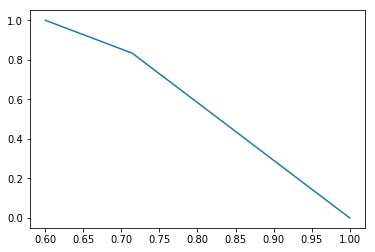

In [4]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)

Text(0.5,0,'FPR')

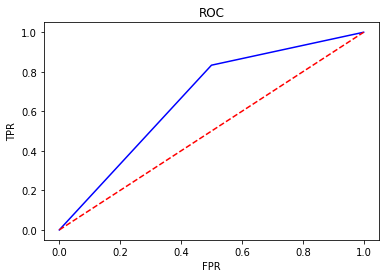

In [5]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [6]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [7]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237


### 1.4 经验总结
赛题理解是开始比赛的第一步，赛题的理解有助于对竞赛全局的把握。通过赛题理解有助于对赛题的业务逻辑把握，对于后期的特征工程构建和模型选择都尤为重要。
- 在开始比赛之前要对赛题进行充分的了解。
- 比赛什么时候开始，什么时候结束，什么时候换B榜数据。
- 和该比赛有没有类似的比赛可以参考借鉴。
- 线上提交结果的次数往往是有限的，提前了解每日可以提交的次数。
- 比赛使用的是什么评价指标，可以选择相同的评价指标作为线下验证的方式。



### 1.5 拓展知识——评分卡
评分卡是一张拥有分数刻度会让相应阈值的表。信用评分卡是用于用户信用的一张刻度表。以下代码是一个非标准评分卡的代码流程，用于刻画用户的信用评分。评分卡是金融风控中常用的一种对于用户信用进行刻画的手段哦！

In [ ]:
#评分卡 不是标准评分卡
def Score(prob,P0=600,PDO=20,badrate=None,goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score

END.
【 杨冰楠：Datawhale成员，金融风控爱好者。】


关于Datawhale：
Datawhale是一个专注于数据科学与AI领域的开源组织，汇集了众多领域院校和知名企业的优秀学习者，聚合了一群有开源精神和探索精神的团队成员。Datawhale 以“for the learner，和学习者一起成长”为愿景，鼓励真实地展现自我、开放包容、互信互助、敢于试错和勇于担当。同时 Datawhale 用开源的理念去探索开源内容、开源学习和开源方案，赋能人才培养，助力人才成长，建立起人与人，人与知识，人与企业和人与未来的联结。
本次数据挖掘路径学习，专题知识将在天池分享，详情可关注Datawhale：

![logo.png](https://img-blog.csdnimg.cn/2020091301022698.png#pic_center)
